In [1]:
import numpy as np
import MDAnalysis
import MDAnalysis.analysis.leaflet
import MDAnalysis.analysis.rms
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import sklearn
from sklearn.decomposition import PCA

In [2]:
def dis (sel1, sel2, x) :
	res_i = x.select_atoms(sel1 + ' and name CA').coordinates()
	res_j = x.select_atoms(sel2 + ' and name CA').coordinates()
	dis = np.linalg.norm(res_i - res_j)
	return dis

In [3]:
def FEZ_traj(A, B, C, D) :
	u = MDAnalysis.Universe(A, B)
	Fen_A = []
	Fen_B = []
	Zip_A = []
	Zip_B = []
	Exp_A = []
	Exp_B = []
	Fen_A_2 = []
	Fen_B_2 = []
	Zip_A_2 = []
	Zip_B_2 = []
	Exp_A_2 = []
	Exp_B_2 = []
	for ts in u.trajectory:
		protein = u.select_atoms('protein')
		Fen_A.append(dis('resid 324 and segid A', 'resid 198 and segid B', protein))
		Fen_B.append(dis('resid 324 and segid B', 'resid 198 and segid A', protein))
		Zip_A.append(dis('resid 326 and segid A', 'resid 237 and segid A', protein))
		Zip_B.append(dis('resid 326 and segid B', 'resid 237 and segid B', protein))
		Exp_A.append(dis('resid 322 and segid A', 'resid 212 and segid A', protein))
		Exp_B.append(dis('resid 322 and segid B', 'resid 212 and segid B', protein))	
	for i in Fen_A :
		if i < 5.5 :
			Fen_A_2.append(Fen_A.index(i))
	for i in Fen_B :
		if i < 5.5 :
			Fen_B_2.append(Fen_B.index(i))
	for i in Zip_A :
		if i > 11.5 :
			Zip_A_2.append(Zip_A.index(i))
	for i in Zip_B :
		if i > 11.5 :
			Zip_B_2.append(Zip_B.index(i))
	for i in Exp_A :
		if i > 11.5 :
			Exp_A_2.append(Exp_A.index(i))
	for i in Exp_B :
		if i > 11.5 :
			Exp_B_2.append(Exp_B.index(i))
	for i in Fen_A_2 :
		if i in Zip_A_2 and Exp_A_2 :
			C.append(i)
	for i in Fen_B_2 :
		if i in Zip_B_2 and Exp_B_2 :
			D.append(i)
	if C == [] :
		C.append(float(101))
	if D == [] :
		D.append(float(101))

In [4]:
def apl_attach(A, B):
	test = []
	for i in A:
		for j, t in enumerate((B[:,0])/1000):
        		if i == t:
        	    		test.append(B[j,1])
	if test == [] :
		test.append(float(0))
	C = np.stack((A, test), axis = -1)
	return C

In [41]:
def draw_vector(v0, v1, ax = None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->', linewidth = 2, color = 'orange', shrinkA = 0, shrinkB = 0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)


# Calculations

In [7]:
########## APL

apl = []

##### DFPC
### 1b

d1 = np.loadtxt('../../DFPC/Backwards/md/1bar/analysis/apl.xvg', skiprows = 15)
mean1 = np.mean(d1[25:75, 1])
apl.append(mean1)

#d2 = np.loadtxt('../../DFPC/Backwards/md/1bar/repeat/analysis/apl.xvg', skiprows = 15)
#mean2 = np.mean(d2[25:75, 1])
#apl.append(mean2)

### -30b

d3 = np.loadtxt('../../DFPC/Backwards/md/30bar/repeat1/analysis/apl.xvg', skiprows = 15)
mean3 = np.mean(d3[25:75, 1])
apl.append(mean3)

d4 = np.loadtxt('../../DFPC/Backwards/md/30bar/repeat2/analysis/apl.xvg', skiprows = 15)
mean4 = np.mean(d4[25:75, 1])
apl.append(mean4)

### -40b

d5 = np.loadtxt('../../DFPC/Backwards/md/40bar/repeat1/analysis/apl.xvg', skiprows = 15)
mean5 = np.mean(d5[25:75, 1])
apl.append(mean5)

d6 = np.loadtxt('../../DFPC/Backwards/md/40bar/repeat2/analysis/apl.xvg', skiprows = 15)
mean6 = np.mean(d6[25:75, 1])
apl.append(mean6)

d7 = np.loadtxt('../../DFPC/Backwards/md/40bar/repeat3/analysis/apl.xvg', skiprows = 15)
mean7 = np.mean(d7[25:75, 1])
apl.append(mean7)

##### DOPC
### 1b

d8 = np.loadtxt('../../DOPC/Backwards/md/1bar/analysis/apl.xvg', skiprows = 15)
mean8 = np.mean(d8[25:75, 1])
apl.append(mean8)

d9 = np.loadtxt('../../DOPC/Backwards/md/1bar/repeat/analysis/apl.xvg', skiprows = 15)
mean9 = np.mean(d9[25:75, 1])
apl.append(mean9)

### -30b

d10 = np.loadtxt('../../DOPC/Backwards/md/30bar/repeat1/analysis/apl.xvg', skiprows = 15)
mean10 = np.mean(d10[25:75, 1])
apl.append(mean10)

d11 = np.loadtxt('../../DOPC/Backwards/md/30bar/repeat2/analysis/apl.xvg', skiprows = 15)
mean11 = np.mean(d11[25:75, 1])
apl.append(mean11)

### -40b

d12 = np.loadtxt('../../DOPC/Backwards/md/40bar/repeat1/analysis/apl.xvg', skiprows = 15)
mean12 = np.mean(d12[25:75, 1])
apl.append(mean12)

d13 = np.loadtxt('../../DOPC/Backwards/md/40bar/repeat2/analysis/apl.xvg', skiprows = 15)
mean13 = np.mean(d13[25:75, 1])
apl.append(mean13)

d14 = np.loadtxt('../../DOPC/Backwards/md/40bar/repeat3/analysis/apl.xvg', skiprows = 15)
mean14 = np.mean(d14[25:75, 1])
apl.append(mean14)

### -50b

d15 = np.loadtxt('../../DOPC/Backwards/md/50bar/repeat1/analysis/apl.xvg', skiprows = 15)
mean15 = np.mean(d15[25:75, 1])
apl.append(mean15)

#d16 = np.loadtxt('../../DOPC/Backwards/md/50bar/repeat2/analysis/apl.xvg', skiprows = 15)
#mean16 = np.mean(d16[25:75, 1])
#apl.append(mean16)

##### DVPC
### 1b

d17 = np.loadtxt('../../DVPC/Backwards/md/1bar/analysis/apl.xvg', skiprows = 15)
mean17 = np.mean(d17[25:75, 1])
apl.append(mean17)

d18 = np.loadtxt('../../DVPC/Backwards/md/1bar/repeat/analysis/apl.xvg', skiprows = 15)
mean18 = np.mean(d18[25:75, 1])
apl.append(mean18)

### -40b

d19 = np.loadtxt('../../DVPC/Backwards/md/40bar/repeat1/analysis/apl.xvg', skiprows = 15)
mean19 = np.mean(d19[25:75, 1])
apl.append(mean19)

d20 = np.loadtxt('../../DVPC/Backwards/md/40bar/repeat2/analysis/apl.xvg', skiprows = 15)
mean20 = np.mean(d20[25:75, 1])
apl.append(mean20)

d21 = np.loadtxt('../../DVPC/Backwards/md/40bar/repeat3/analysis/apl.xvg', skiprows = 15)
mean21 = np.mean(d21[25:75, 1])
apl.append(mean21)

### -50b

d22 = np.loadtxt('../../DVPC/Backwards/md/50bar/repeat1/analysis/apl.xvg', skiprows = 15)
mean22 = np.mean(d22[25:75, 1])
apl.append(mean22)

d23 = np.loadtxt('../../DVPC/Backwards/md/50bar/repeat2/analysis/apl.xvg', skiprows = 15)
mean23 = np.mean(d23[25:75, 1])
apl.append(mean23)

### -60b

d24 = np.loadtxt('../../DVPC/Backwards/md/60bar/repeat1/analysis/apl.xvg', skiprows = 15)
mean24 = np.mean(d24[25:75, 1])
apl.append(mean24)

d25 = np.loadtxt('../../DVPC/Backwards/md/60bar/repeat2/analysis/apl.xvg', skiprows = 15)
mean25 = np.mean(d25[25:75, 1])
apl.append(mean25)

########## FEZ DISTANCES

fezA = []
fezB = []

##### DFPC
### 1b

F1b1chA = []
F1b1chB = []
FEZ_traj('../../DFPC/Backwards/md/1bar/analysis/mdord.pdb', '../../DFPC/Backwards/md/1bar/analysis/md-c.xtc', F1b1chA, F1b1chB)
fezA.append(F1b1chA[0])
fezB.append(F1b1chB[0])

#F1b2chA = []
#F1b2chB = []
#FEZ_traj('../../DFPC/Backwards/md/1bar/repeat/analysis/mdord.pdb', '../../DFPC/Backwards/md/1bar/repeat/analysis/md-c.xtc', F1b2chA, F1b2chB)
#fezA.append(F1b2chA[0])
#fezB.append(F1b2chB[0])

### -30b

F30b1chA = []
F30b1chB = []
FEZ_traj('../../DFPC/Backwards/md/30bar/repeat1/analysis/mdord.pdb', '../../DFPC/Backwards/md/30bar/repeat1/analysis/md-c.xtc', F30b1chA, F30b1chB)
fezA.append(F30b1chA[0])
fezB.append(F30b1chB[0])

F30b2chA = []
F30b2chB = []
FEZ_traj('../../DFPC/Backwards/md/30bar/repeat2/analysis/mdord.pdb', '../../DFPC/Backwards/md/30bar/repeat2/analysis/md-c.xtc', F30b2chA, F30b2chB)
fezA.append(F30b2chA[0])
fezB.append(F30b2chB[0])

### -40b

F40b1chA = []
F40b1chB = []
FEZ_traj('../../DFPC/Backwards/md/40bar/repeat1/analysis/mdord.pdb', '../../DFPC/Backwards/md/40bar/repeat1/analysis/md-c.xtc', F40b1chA, F40b1chB)
fezA.append(F40b1chA[0])
fezB.append(F40b1chB[0])

F40b2chA = []
F40b2chB = []
FEZ_traj('../../DFPC/Backwards/md/40bar/repeat2/analysis/mdord.pdb', '../../DFPC/Backwards/md/40bar/repeat2/analysis/md-c.xtc', F40b2chA, F40b2chB)
fezA.append(F40b2chA[0])
fezB.append(F40b2chB[0])

F40b3chA = []
F40b3chB = []
FEZ_traj('../../DFPC/Backwards/md/40bar/repeat3/analysis/mdord.pdb', '../../DFPC/Backwards/md/40bar/repeat3/analysis/md-c.xtc', F40b3chA, F40b3chB)
fezA.append(F40b3chA[0])
fezB.append(F40b3chB[0])

##### DOPC
### 1b

O1b1chA = []
O1b1chB = []
FEZ_traj('../../DOPC/Backwards/md/1bar/analysis/mdord.pdb', '../../DOPC/Backwards/md/1bar/analysis/md-c.xtc', O1b1chA, O1b1chB)
fezA.append(O1b1chA[0])
fezB.append(O1b1chB[0])

O1b2chA = []
O1b2chB = []
FEZ_traj('../../DOPC/Backwards/md/1bar/repeat/analysis/mdord.pdb', '../../DOPC/Backwards/md/1bar/repeat/analysis/md-c.xtc', O1b2chA, O1b2chB)
fezA.append(O1b2chA[0])
fezB.append(O1b2chB[0])

### -30b

O30b1chA = []
O30b1chB = []
FEZ_traj('../../DOPC/Backwards/md/30bar/repeat1/analysis/mdord.pdb', '../../DOPC/Backwards/md/30bar/repeat1/analysis/md-c.xtc', O30b1chA, O30b1chB)
fezA.append(O30b1chA[0])
fezB.append(O30b1chB[0])

O30b2chA = []
O30b2chB = []
FEZ_traj('../../DOPC/Backwards/md/30bar/repeat2/analysis/mdord.pdb', '../../DOPC/Backwards/md/30bar/repeat2/analysis/md-c.xtc', O30b2chA, O30b2chB)
fezA.append(O30b2chA[0])
fezB.append(O30b2chB[0])

### -40b

O40b1chA = []
O40b1chB = []
FEZ_traj('../../DOPC/Backwards/md/40bar/repeat1/analysis/mdord.pdb', '../../DOPC/Backwards/md/40bar/repeat1/analysis/md-c.xtc', O40b1chA, O40b1chB)
fezA.append(O40b1chA[0])
fezB.append(O40b1chB[0])

O40b2chA = []
O40b2chB = []
FEZ_traj('../../DOPC/Backwards/md/40bar/repeat2/analysis/mdord.pdb', '../../DOPC/Backwards/md/40bar/repeat2/analysis/md-c.xtc', O40b2chA, O40b2chB)
fezA.append(O40b2chA[0])
fezB.append(O40b2chB[0])

O40b3chA = []
O40b3chB = []
FEZ_traj('../../DOPC/Backwards/md/40bar/repeat3/analysis/mdord.pdb', '../../DOPC/Backwards/md/40bar/repeat3/analysis/md-c.xtc', O40b3chA, O40b3chB)
fezA.append(O40b3chA[0])
fezB.append(O40b3chB[0])

### -50b

O50b1chA = []
O50b1chB = []
FEZ_traj('../../DOPC/Backwards/md/50bar/repeat1/analysis/mdord.pdb', '../../DOPC/Backwards/md/50bar/repeat1/analysis/md-c.xtc', O50b1chA, O50b1chB)
fezA.append(O50b1chA[0])
fezB.append(O50b1chB[0])

#O50b2chA = []
#O50b2chB = []
#FEZ_traj('../../DOPC/Backwards/md/50bar/repeat2/analysis/mdord.pdb', '../../DOPC/Backwards/md/50bar/repeat2/analysis/md-c.xtc', O50b2chA, O50b2chB)
#fezA.append(O50b2chA[0])
#fezB.append(O50b2chB[0])

##### DVPC
### 1b

V1b1chA = []
V1b1chB = []
FEZ_traj('../../DVPC/Backwards/md/1bar/analysis/mdord.pdb', '../../DVPC/Backwards/md/1bar/analysis/md-c.xtc', V1b1chA, V1b1chB)
fezA.append(V1b1chA[0])
fezB.append(V1b1chB[0])

V1b2chA = []
V1b2chB = []
FEZ_traj('../../DVPC/Backwards/md/1bar/repeat/analysis/mdord.pdb', '../../DVPC/Backwards/md/1bar/repeat/analysis/md-c.xtc', V1b2chA, V1b2chB)
fezA.append(V1b2chA[0])
fezB.append(V1b2chB[0])

### -40b

V40b1chA = []
V40b1chB = []
FEZ_traj('../../DVPC/Backwards/md/40bar/repeat1/analysis/mdord.pdb', '../../DVPC/Backwards/md/40bar/repeat1/analysis/md-c.xtc', V40b1chA, V40b1chB)
fezA.append(V40b1chA[0])
fezB.append(V40b1chB[0])

V40b2chA = []
V40b2chB = []
FEZ_traj('../../DVPC/Backwards/md/40bar/repeat2/analysis/mdord.pdb', '../../DVPC/Backwards/md/40bar/repeat2/analysis/md-c.xtc', V40b2chA, V40b2chB)
fezA.append(V40b2chA[0])
fezB.append(V40b2chB[0])

V40b3chA = []
V40b3chB = []
FEZ_traj('../../DVPC/Backwards/md/40bar/repeat3/analysis/mdord.pdb', '../../DVPC/Backwards/md/40bar/repeat3/analysis/md-c.xtc', V40b3chA, V40b3chB)
fezA.append(V40b3chA[0])
fezB.append(V40b3chB[0])

### -50b

V50b1chA = []
V50b1chB = []
FEZ_traj('../../DVPC/Backwards/md/50bar/repeat1/analysis/mdord.pdb', '../../DVPC/Backwards/md/50bar/repeat1/analysis/md-c.xtc', V50b1chA, V50b1chB)
fezA.append(V50b1chA[0])
fezB.append(V50b1chB[0])
V50b2chA = []
V50b2chB = []
FEZ_traj('../../DVPC/Backwards/md/50bar/repeat2/analysis/mdord.pdb', '../../DVPC/Backwards/md/50bar/repeat2/analysis/md-c.xtc', V50b2chA, V50b2chB)
fezA.append(V50b2chA[0])
fezB.append(V50b2chB[0])

### -60b

V60b1chA = []
V60b1chB = []
FEZ_traj('../../DVPC/Backwards/md/60bar/repeat1/analysis/mdord.pdb', '../../DVPC/Backwards/md/60bar/repeat1/analysis/md-c.xtc', V60b1chA, V60b1chB)
fezA.append(V60b1chA[0])
fezB.append(V60b1chB[0])

V60b2chA = []
V60b2chB = []
FEZ_traj('../../DVPC/Backwards/md/60bar/repeat2/analysis/mdord.pdb', '../../DVPC/Backwards/md/60bar/repeat2/analysis/md-c.xtc', V60b2chA, V60b2chB)
fezA.append(V60b2chA[0])
fezB.append(V60b2chB[0])

In [8]:
########## APL ATTACH

apl1A = apl_attach(F1b1chA, d1)
apl1B = apl_attach(F1b1chB, d1)
#apl2A = apl_attach(F1b2chA, d2)
#apl2B = apl_attach(F1b2chB, d2)
apl3A = apl_attach(F30b1chA, d3)
apl3B = apl_attach(F30b1chB, d3)
apl4A = apl_attach(F30b2chA, d4)
apl4B = apl_attach(F30b2chB, d4)
apl5A = apl_attach(F40b1chA, d5)
apl5B = apl_attach(F40b1chB, d5)
apl6A = apl_attach(F40b2chA, d6)
apl6B = apl_attach(F40b2chB, d6)
apl7A = apl_attach(F40b3chA, d7)
apl7B = apl_attach(F40b3chB, d7)
apl8A = apl_attach(O1b1chA, d8)
apl8B = apl_attach(O1b1chB, d8)
apl9A = apl_attach(O1b2chA, d9)
apl9B = apl_attach(O1b2chB, d9)
apl10A = apl_attach(O30b1chA, d10)
apl10B = apl_attach(O30b1chB, d10)
apl11A = apl_attach(O30b2chA, d11)
apl11B = apl_attach(O30b2chB, d11)
apl12A = apl_attach(O40b1chA, d12)
apl12B = apl_attach(O40b1chB, d12)
apl13A = apl_attach(O40b2chA, d13)
apl13B = apl_attach(O40b2chB, d13)
apl14A = apl_attach(O40b3chA, d14)
apl14B = apl_attach(O40b3chB, d14)
apl15A = apl_attach(O50b1chA, d15)
apl15B = apl_attach(O50b1chB, d15)
#apl16A = apl_attach(O50b2chA, d16)
#apl16B = apl_attach(O50b2chB, d16)
apl17A = apl_attach(V1b1chA, d17)
apl17B = apl_attach(V1b1chB, d17)
apl18A = apl_attach(V1b2chA, d18)
apl18B = apl_attach(V1b2chB, d18)
apl19A = apl_attach(V40b1chA, d19)
apl19B = apl_attach(V40b1chB, d19)
apl20A = apl_attach(V40b2chA, d20)
apl20B = apl_attach(V40b2chB, d20)
apl21A = apl_attach(V40b3chA, d21)
apl21B = apl_attach(V40b3chB, d21)
apl22A = apl_attach(V50b1chA, d22)
apl22B = apl_attach(V50b1chB, d22)
apl23A = apl_attach(V50b2chA, d23)
apl23B = apl_attach(V50b2chB, d23)
apl24A = apl_attach(V60b1chA, d24)
apl24B = apl_attach(V60b1chB, d24)
apl25A = apl_attach(V60b2chA, d25)
apl25B = apl_attach(V60b2chB, d25)

In [9]:
apltot = np.concatenate((apl1A, apl1B, apl3A, apl3B, apl4A, apl4B, apl5A, apl5B, apl6A, apl6B, apl7A, apl7B, apl8A, apl8B, apl9A, apl9B, apl10A, apl10B, apl11A, apl11B, apl12A, apl12B, apl13A, apl13B, apl14A, apl14B, apl15A, apl15B, apl17A, apl17B, apl18A, apl18B, apl19A, apl19B, apl20A, apl20B, apl21A, apl21B, apl22A, apl22B, apl23A, apl23B, apl24A, apl24B, apl25A, apl25B), axis = 0)

In [10]:
apl_red = apltot[np.all(apltot!=101, axis=1)]
apl_red_big = np.multiply(apl_red, [1, 100])

In [11]:
first_apl_big = np.multiply(apl, 100)
first_pcastack_1 = np.stack((fezA, first_apl_big), axis = -1)
first_pcastack_2 = np.stack((fezB, first_apl_big), axis = -1)
first_pcastack = np.concatenate((first_pcastack_1, first_pcastack_2), axis = 0)
first_pca_red = first_pcastack[np.all(first_pcastack!=101, axis=1)]

In [34]:
#pca_a = PCA(n_components=2)
#pca_a.fit(first_pca_red)
#pca_b = PCA(n_components=1)
#pca_b.fit(first_pca_red)
#first_pca_trans = pca_b.transform(first_pca_red)
#first_pca_new = pca_b.inverse_transform(first_pca_trans)

X = apl_red_big
pca = PCA(n_components=2)
pca.fit(X)
pca_2 = PCA(n_components=1)
pca_2.fit(apl_red_big)
apl_trans = pca_2.transform(apl_red_big)
apl_new = pca_2.inverse_transform(apl_trans)

Y = first_pca_red
pca1 = PCA(n_components=2)
pca1.fit(Y)
pca2 = PCA(n_components=1)
pca2.fit(first_pca_red)
fpr_trans = pca2.transform(first_pca_red)
fpr_new = pca2.inverse_transform(fpr_trans)

[0, 100, 70, 120]

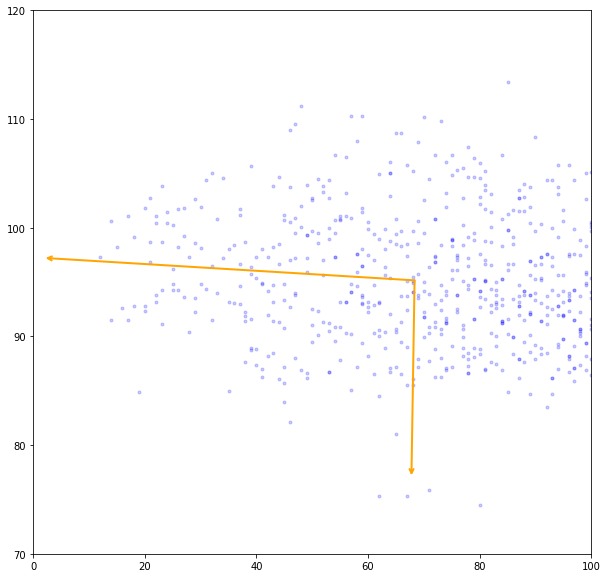

In [47]:
plt.figure(figsize = (10,10))
plt.scatter(X[:,0], X[:,1], alpha = 0.2, marker = '.', color = 'blue')
#plt.scatter(apl_new[:,0], apl_new[:,1], alpha = 0.8, marker = '.', color = 'blue')
#plt.scatter(Y[:,0], Y[:,1], alpha = 0.4, color = 'green', marker = '^')
#plt.scatter(fpr_new[:,0], fpr_new[:,1], alpha = 0.8, color = 'red', marker = '^')

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
    
w = [0,100,70,120]
plt.axis(w)

Text(0,0.5,'cumulative explained variance')

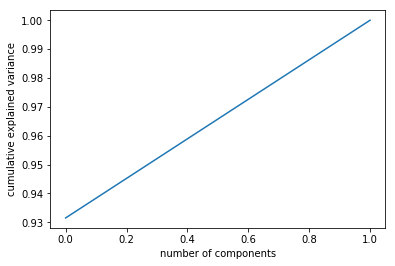

In [45]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')